# MODELO PREDICTIVO PARA LAS ROTACIONES GENERADAS EN WALMART PARA CADA HORA DE TRABAJO

## Importar Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import psycopg2

## Credenciales de la BD

In [4]:
user = 'kzvwgmey'
dbname = 'kzvwgmey'
host = 'batyr.db.elephantsql.com'
password = 'Fch8wl_TUVAul6pV-1z4Z-fXyKwEBPRs'

myConnection = psycopg2.connect(host = host, user = user, password = password, dbname = dbname)


## Funcion para ejecutar Querys Select

In [5]:
def SelectAllQuery(query):
    cur = myConnection.cursor()
    try:
        cur.execute(query)
        data = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
    except Exception as e:
        myConnection.commit()
        print('Error en el query:', e)
    else:
        cur.close()
        myConnection.commit()
        
        return(data,colnames) 

## Query a utilizar

In [16]:
queryVentas = f'''
 SELECT  COUNT(anio) AS "cuenta", anio, mes, semana, dia,hora FROM "Hechos_Ventas"
  INNER JOIN "Dimension_Tiempo_Ventas" USING (id_dtiempo)
  GROUP BY anio, mes,semana, dia, hora
  ORDER BY anio, mes, semana, dia, hora;
  '''
hechosVentas = SelectAllQuery(queryVentas)
dfHechosVentas = pd.DataFrame(hechosVentas[0], columns = hechosVentas[1])
print(dfHechosVentas)

    cuenta  anio  mes  semana  dia  hora
0       22  2021    6      24    7     9
1        3  2021    6      24    7    11
2       12  2021    6      24    7    12
3       18  2021    6      24    7    13
4        4  2021    6      24    7    15
..     ...   ...  ...     ...  ...   ...
74       6  2021    6      25    7    16
75       4  2021    6      25    7    17
76       4  2021    6      25    7    18
77       9  2021    6      26    2    10
78       2  2021    6      26    2    12

[79 rows x 6 columns]


## Dividir DataFrame

In [17]:
X = dfHechosVentas['hora'].values.reshape(-1,1) 
y = dfHechosVentas['cuenta'].values

## Setear data de testeo y data de entrenamiento

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

## Crear la regresion

In [19]:
regresor = LinearRegression()
regresor.fit(X_train, y_train)

LinearRegression()

## Entrenar la regresion y generar predicciones

In [20]:
y_fit = regresor.predict(X_train) 
y_pred = regresor.predict(X_test)

## Grafico de la regresion

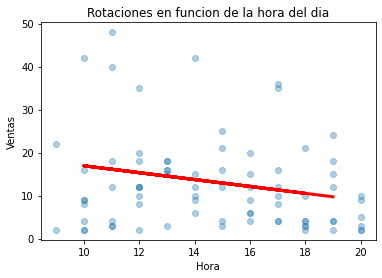

In [21]:
plt.scatter(X, y, alpha=0.35)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Rotaciones en funcion de la hora del dia')
plt.xlabel('Hora')
plt.ylabel('Ventas')
plt.show()

### FUNCION PARA PROBAR LA PREDICCION

In [22]:
def prediccion(numero):
    if numero < 9 or numero > 20:
        return ('A esta hora no se trabaja, se hacen 0 rotaciones')
    return f'A la hora militar {numero} se predice que se hacen {int(y_pred[numero-9])} rotaciones'

#### CORRA EL SIGUIENTE CODIGO PARA PROBAR EL FUNCIONAMIENTO DE LA REGRESION LINEAL

In [42]:
num = input('Ingrese una hora entre las 9 y las 20 para predecir cuantas rotaciones habrann en la tienda a esa hora:\n')
print(prediccion(int(num))) if num.isdigit() else print('Tiene que ser un numero entero entre el 9 y el 20, intente de nuevo')

Ingrese una hora entre las 9 y las 20 para predecir cuantas rotaciones habrann en la tienda a esa hora:
 21


A esta hora no se trabaja, se hacen 0 rotaciones
